In [1]:
from helpers import *
from models import Tiny
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import torch

Label: Hat	Confidence: 0.05460	Class Probability: 0.99549
Label: Rifle	Confidence: 0.06927	Class Probability: 0.61975
Label: Jacket	Confidence: 0.10165	Class Probability: 0.69995
Label: Hat	Confidence: 0.08258	Class Probability: 0.96327


<Figure size 432x288 with 0 Axes>

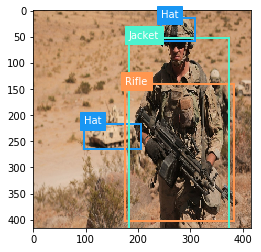

In [31]:
N_CLASSES = 6
IMG_SIZE = (416, 416)

paths = {"img": "data/rifle.jpg", 
         "names": "data/custom.names",
         "weights": "data/custom.weights"}

names = load_names(paths["names"])

model = Tiny(N_CLASSES, IMG_SIZE)
model.load_weights(paths["weights"])

x = load_img(paths["img"])
detections = model(x)
detections = nms(detections, 
                 confidence_threshold=0.05, 
                 overlap_threshold=0.5)

img = read_img(paths["img"])
img = np.array(img)

plt.figure()
fig, ax = plt.subplots()
ax.imshow(img)

cmap = plt.get_cmap("rainbow")
colors = [cmap(i) for i in np.linspace(0, 1, N_CLASSES)]

for bboxes in detections:
    for x1, y1, x2, y2, confidence, probability, class_prediction in bboxes:
        class_idx = int(class_prediction)
        width, height = x2 - x1, y2 - y1
        color = colors[class_idx]
        patch = patches.Rectangle((x1, y1), 
                                  width, height, 
                                  linewidth=2, 
                                  edgecolor=color, 
                                  facecolor="none")
        ax.add_patch(patch)
        plt.text(x1, y1, 
                 s=names[int(class_prediction)], 
                 color="white",  
                 bbox={"color": color})
        print("Label: {}\tConfidence: {:.5f}\tClass Probability: {:.5f}".format(names[class_idx], 
                                                                                confidence, 
                                                                                probability))